enter the first derivative in x and y using python syntax :  (2*y - 18*x)/(1+x)


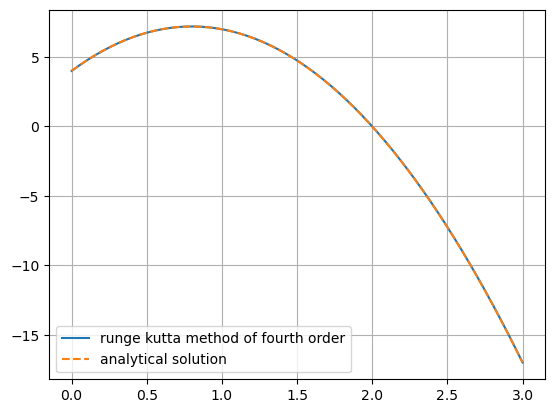

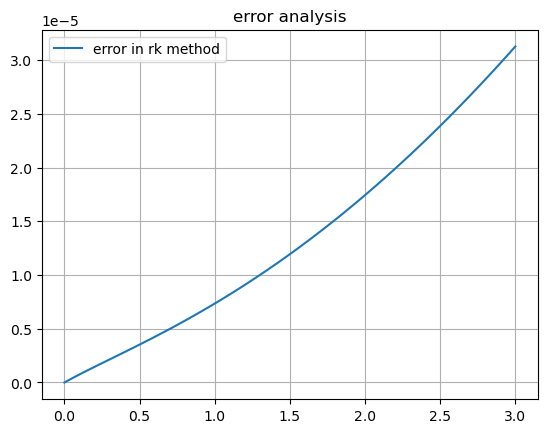

In [75]:
#question 1 - RK4

import numpy as np
import matplotlib.pyplot as plt

inputt = input("enter the first derivative in x and y using python syntax : ")
derivative = lambda x,y : eval(inputt)

def RK4(fxn,x0,xend,y0,steps):
    x = np.linspace(x0,xend,steps)
    y = np.zeros(steps)
    h = (xend - x0)/(steps-1)
    y[0] = y0
    for i in range(steps - 1):
        k1 = fxn(x[i], y[i])
        x_mid = x[i] + h / 2
        y_mid = y[i] + (h / 2) * k1 
        k2 = fxn(x_mid, y_mid)
        y_mid_new = y[i] + (h/2)*k2  
        k3 = fxn(x_mid,y_mid_new)
        y[i+1] = y[i] + h*k3
        k4 = fxn(x[i+1],y[i+1])
        m = ((k1+k4)/6) + ((k2+k3)/3) 
        y[i+1] = y[i] + m*h
    return x, y

x,y = RK4(derivative,0,3,4,60)

y_analytical= lambda x:-5*x**2 + 8*x +4

plt.figure()
plt.plot(x,y,label='runge kutta method of fourth order')
plt.plot(x,y_analytical(x),label="analytical solution",linestyle='--')
plt.legend()
plt.grid()
plt.show()

#error analysis

plt.title('error analysis')
plt.plot(x,abs(y-y_analytical(x)),label='error in rk method')
plt.legend()
plt.grid()
plt.show()

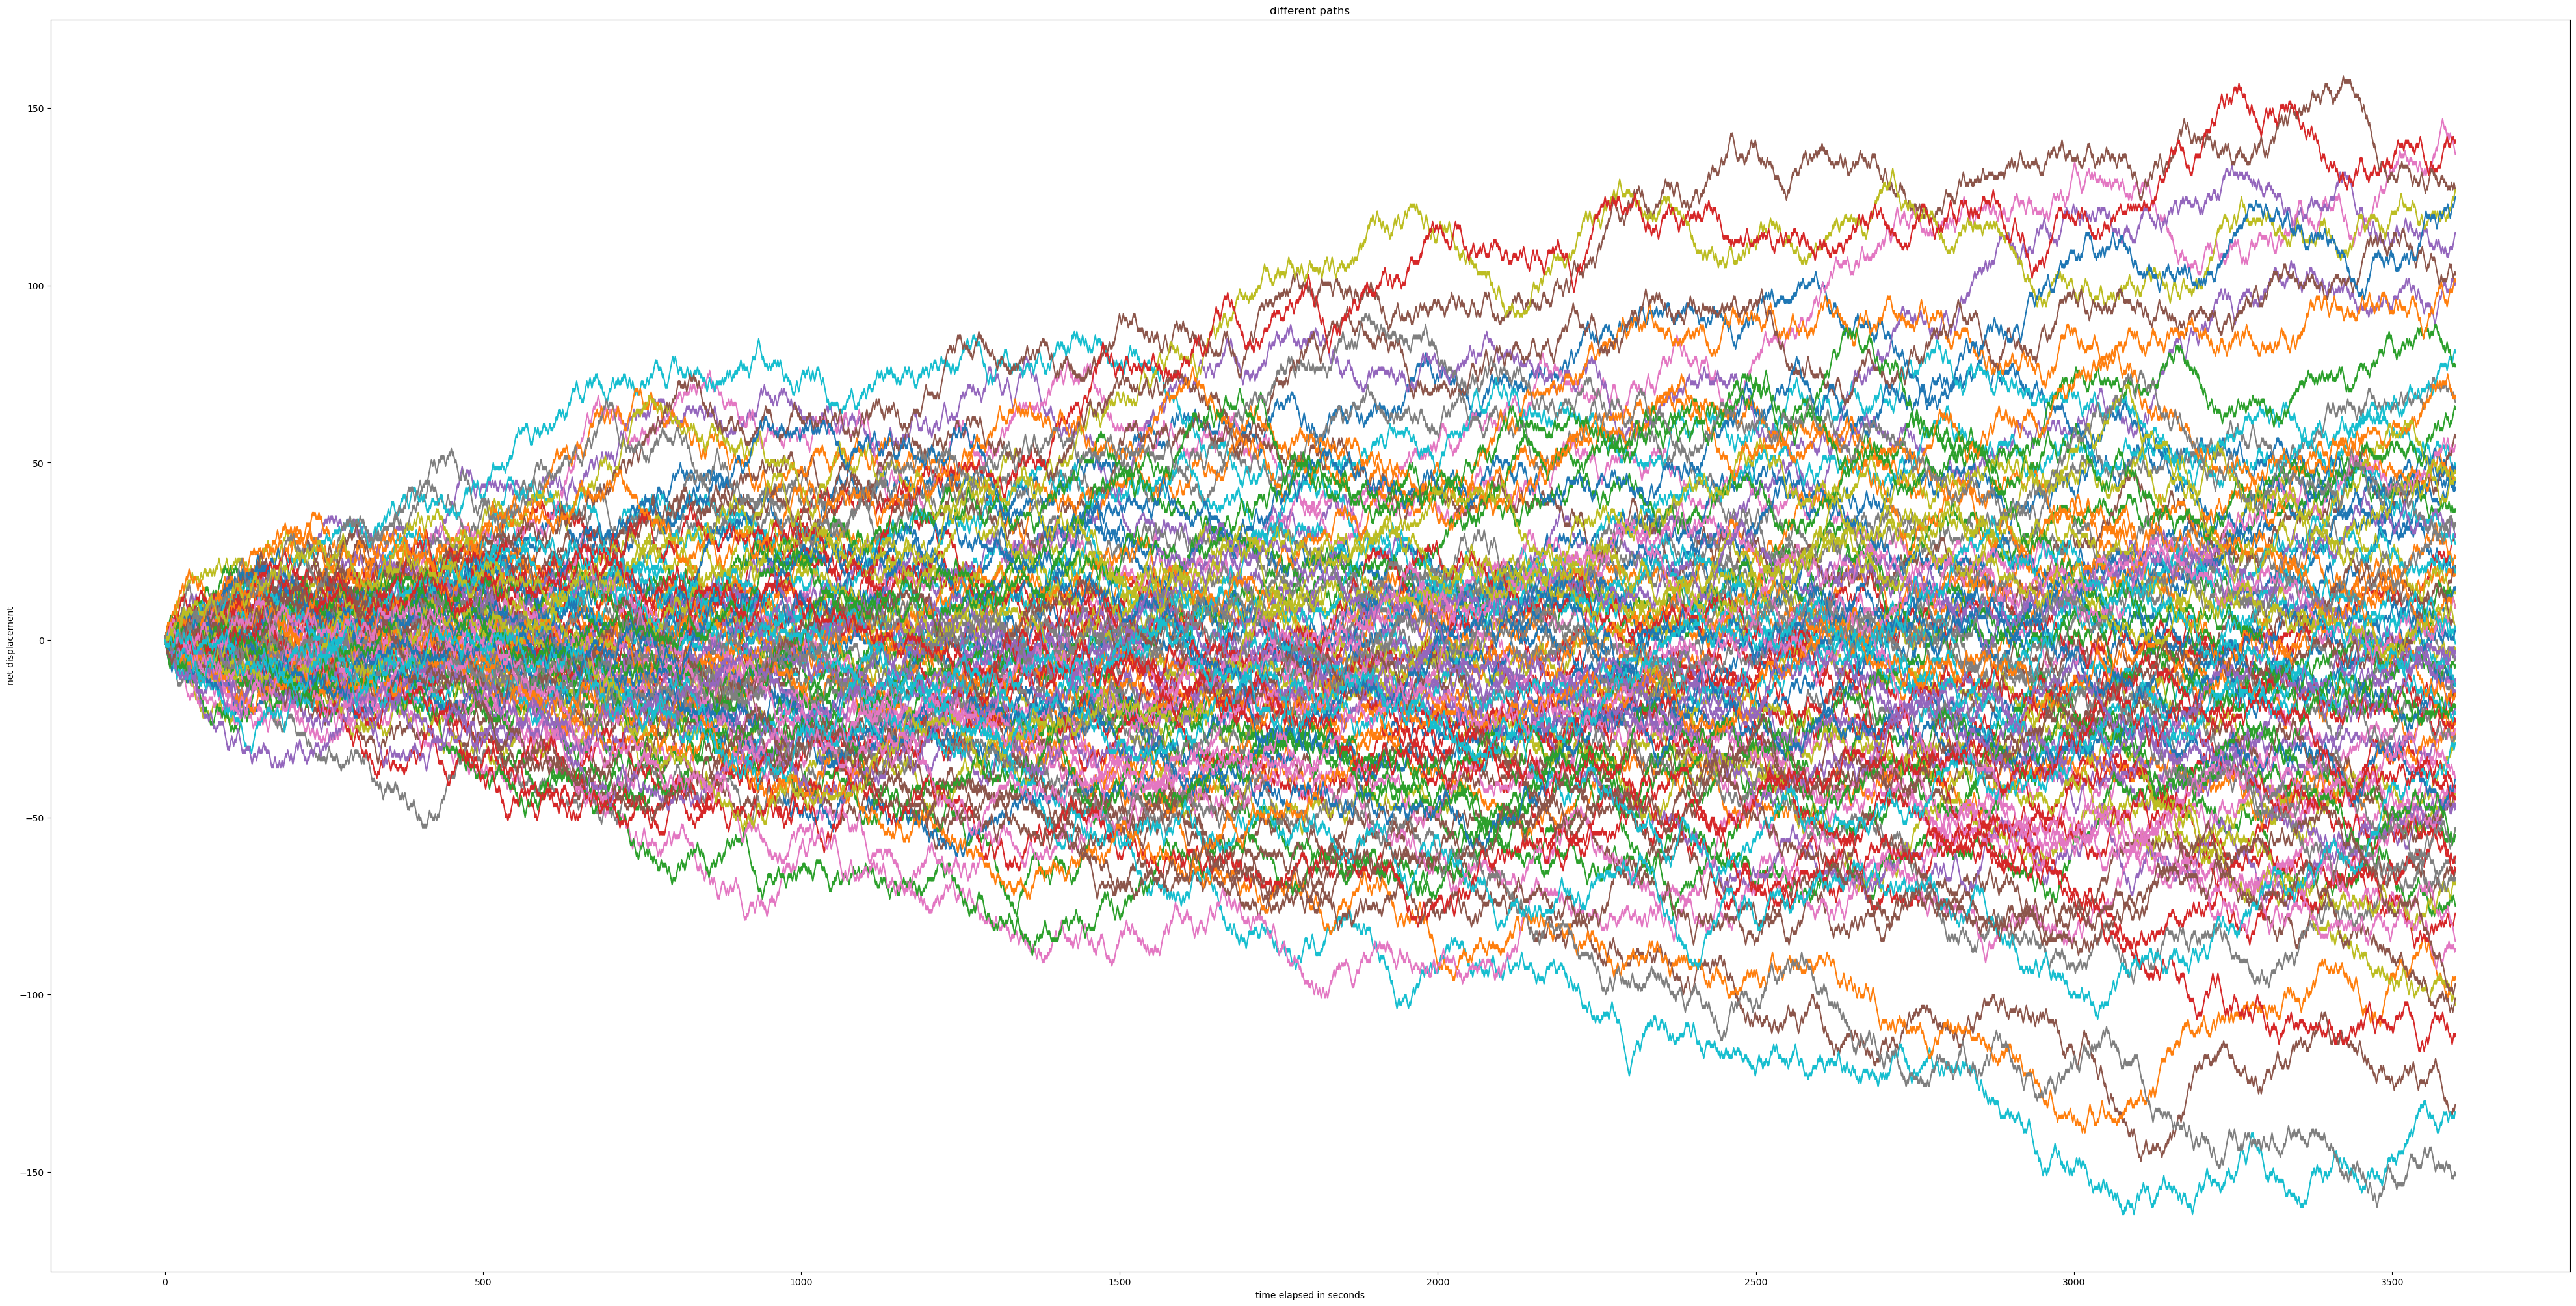

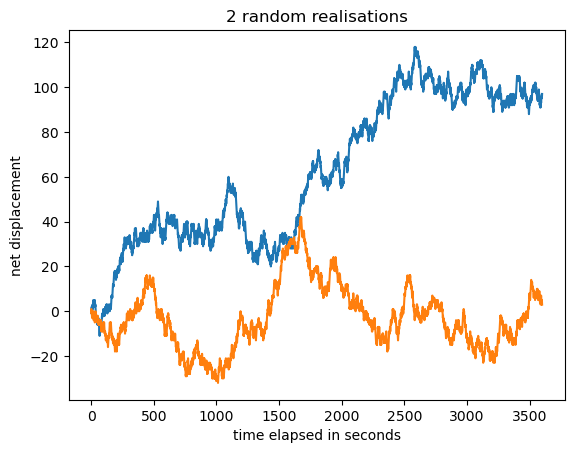

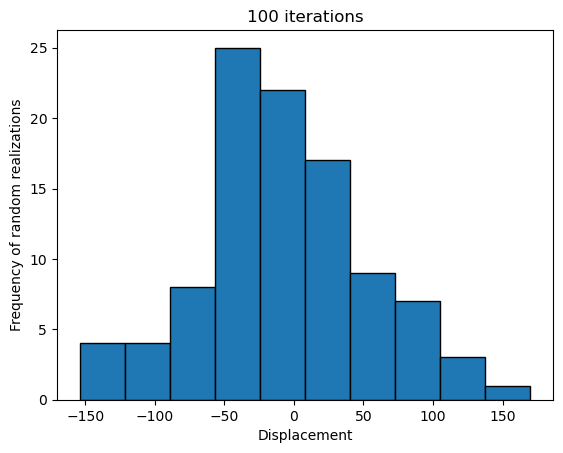

Mean displacement is : -5.82
The root mean sqaured displacement is : 61.92931454489061


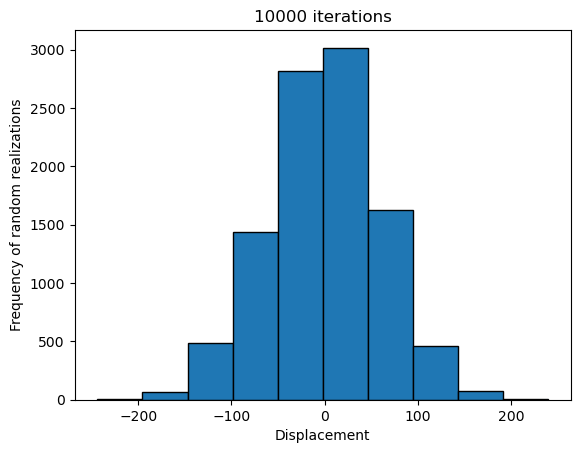

Mean displacement for 10000 iterations is : -0.577
The root mean sqaured displacement for 10000 iterations is : 60.6646618716366
We can see that rms is tending to square root of time, i.e. 60


In [38]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

displacement = []
plt.figure(figsize=(50,25))
for i in range(100):
    x = random.choice([-1,1],size=3600)
    sum = np.sum(x)
    displacement.append(sum)
    y = random.choice([-1,1],size=3600)
    total = np.zeros(3600)
    x_axis = np.arange(0,3600)
    total[0] = 0
    for j in range(len(total)-1):
        total[j+1] = total[j]+y[j] 
    plt.plot(x_axis,total)
    plt.title('different paths')
    plt.ylabel('net displacement')
    plt.xlabel('time elapsed in seconds')

#plotting for 2 random realizations
y = random.choice([-1,1],size=3600)
total = np.zeros(3600)
x_axis = np.arange(0,3600)
total[0] = 0
for i in range(len(total)-1):
    total[i+1] = total[i]+y[i] 
plt.figure()
plt.plot(x_axis,total)
plt.ylabel('net displacement')
plt.xlabel('time elapsed in seconds')

z = random.choice([-1,1],size=3600)
total1 = np.zeros(3600)
total1[0] = 0
for i in range(len(total)-1):
    total1[i+1] = total1[i]+z[i] 
plt.plot(x_axis,total1)
plt.title('2 random realisations')
plt.ylabel('net displacement')
plt.xlabel('time elapsed in seconds')
plt.show()

#plotting the histogram of the displacement
plt.hist(displacement, edgecolor='black', align='mid')  
plt.xlabel('Displacement')
plt.ylabel('Frequency of random realizations')
plt.title('100 iterations')
plt.show()

#finding mean and rms 

mean_disp = np.sum(displacement)/len(displacement)
print('Mean displacement is :',mean_disp)

disp_array = np.array(displacement)
disp_square = (disp_array)**2

rms = np.sqrt(np.sum(disp_square)/len(disp_square))
print('The root mean sqaured displacement is :',rms)

#repeating the same process for more number of iterations. 
displacement_1 = []
for i in range(10000):
    x = random.choice([-1,1],size=3600)
    sum = np.sum(x)
    displacement_1.append(sum)

plt.hist(displacement_1, edgecolor='black', align='mid')  
plt.xlabel('Displacement')
plt.ylabel('Frequency of random realizations')
plt.title('10000 iterations')
plt.show()

mean_disp_1 = np.sum(displacement_1)/len(displacement_1)
print('Mean displacement for 10000 iterations is :',mean_disp_1)

disp_array = np.array(displacement_1)
disp_square = (disp_array)**2

rms = np.sqrt(np.sum(disp_square)/len(disp_square))
print('The root mean sqaured displacement for 10000 iterations is :',rms)

print("We can see that rms is tending to square root of time, i.e. 60")

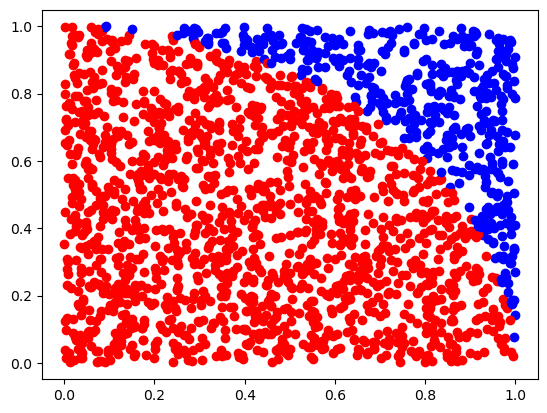

Estimated value of pi is 3.124


In [5]:
#question 3 : estimate pi using monte carlo integration 
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
n = 2000
z_values = [] 
plt.figure()
for i in range(n):
    x = np.random.rand()
    y = np.random.rand()
    if x**2 + y**2 <= 1 :
        z = 1
        z_values.append(z)
        plt.scatter(x,y,color='r')
    else :
        z = 0
        z_values.append(z)
        plt.scatter(x,y,color='b')

plt.show()

pi = (np.sum(z_values)/n)*4
print(f"Estimated value of pi is {pi}")

value,standard deviation of first integral is [-0.00017259  0.02167947]
value,standard deviation of second integral is [0.33312986 0.00267251]


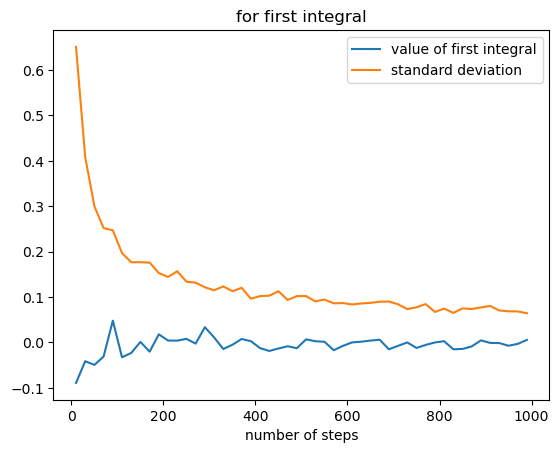

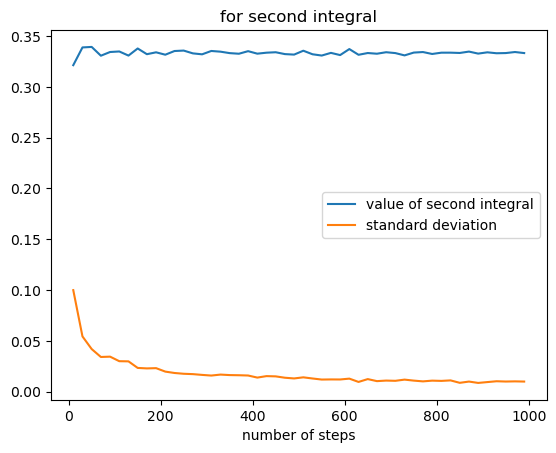

In [37]:
#question 4 : monte carlo integration 
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt

def fn(x): #part 1
    return np.cos(x)

def gn(x): #part 2
    return x**2

def mc_integration(a,b,f,n):
    Int1 = []
    for i in range(100):
        Int = []
        for i in range(n):
            x = a + np.random.rand()*(b-a)
            I = f(x)*(b-a)
            Int.append(I)
        
        Int1.append(np.sum(Int)/n)

    var = []
    for i in range(100):
        var.append((1/100)*((Int1[i]-np.mean(Int1))**2))
    
    return np.array([np.sum(Int1)/100,np.sqrt(np.sum(var))])

print(f"value,standard deviation of first integral is {mc_integration(0,np.pi,fn,10000)}")
print(f"value,standard deviation of second integral is {mc_integration(0,1,gn,10000)}")

n_values = np.arange(10,1000,20)

plt.figure()
II = []
sigma = []
for i in range(len(n_values)):
    II.append(mc_integration(0,np.pi,fn,n_values[i])[0])
    sigma.append(mc_integration(0,np.pi,fn,n_values[i])[1])

plt.plot(n_values,II,label = 'value of first integral')
plt.plot(n_values,sigma,label = 'standard deviation')
plt.xlabel('number of steps')
plt.title('for first integral')
plt.legend()
plt.show()

plt.figure()
II1 = []
sigma1 = []
for i in range(len(n_values)):
    II1.append(mc_integration(0,1,gn,n_values[i])[0])
    sigma1.append(mc_integration(0,1,gn,n_values[i])[1])

plt.plot(n_values,II1,label = 'value of second integral')
plt.plot(n_values,sigma1,label = 'standard deviation')
plt.xlabel('number of steps')
plt.title('for second integral')
plt.legend()
plt.show()

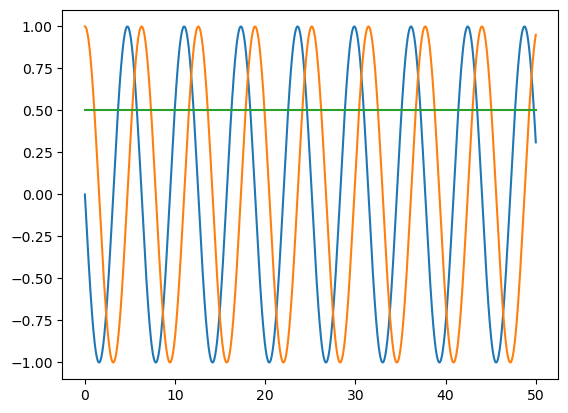

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def RK4(x0,xend,N):
    xaxis = np.linspace(x0,xend,N)
    h = (xend-x0)/N
    #new variable = v 
    v = np.zeros(len(xaxis)) #dy/dx
    v[0] = 0 #given
    y = np.zeros(len(xaxis))
    y[0] = 1
    E_values = np.zeros(N)
    E_values[0] = 1/2
    for i in range(N-1):
        k1 = -y[i]
        m1 = v[i]
        v_mid = v[i] + k1*(h/2)
        y_mid = y[i] + m1*(h/2)
        
        k2 = -(y_mid)
        m2 = v_mid
        v_mid_new = v[i] + k2*(h/2)
        y_mid_new = y[i] + m2*(h/2)
        
        k3 = -(y_mid_new)
        m3 = v_mid_new
        v[i+1] = v[i] + k3*h
        y[i+1] = y[i] + m3*h
        
        k4 = -y[i+1]
        m4 = v[i+1]
        
        K = ((k1+k4)/6) + ((k2+k3)/3)
        M = ((m1+m4)/6) + ((m2+m3)/3)
        v[i+1] = v[i] + K*h
        y[i+1] = y[i] + M*h

        E_values[i+1] = 0.5*(y[i+1]**2) + 0.5*(v[i+1]**2)
    return v,y,xaxis,E_values

v,x,time,E_values = RK4(0,50,1000)

plt.figure()
plt.plot(time,v)
plt.plot(time,x)
plt.plot(time,E_values)
plt.show()
